In [2]:
import itertools
import math
import os
import gsd.hoomd
import hoomd
import numpy as np  
import warnings
import fresnel
import IPython
import packaging.version 
import matplotlib
import io 
import PIL
import freud
import matplotlib.pyplot as plt 

%matplotlib inline 
matplotlib.style.use('ggplot')
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


In [3]:
device = fresnel.Device()
tracer = fresnel.tracer.Path(device=device, w=300, h=300)

def render(snapshot):

    vertices = [
        (0.1709401709401709,-0.5899408284023668),
        (0.1709401709401709,-0.2553254437869822),
        (0.5042735042735043,-0.08994082840236695),
        (0.3931623931623931,0.07544378698224852),
        (0.5042735042735043,0.2446745562130177),
        (0.1709401709401709,0.41005917159763317),
        (-0.16239316239316243,0.2446745562130177),
        (-0.27350427350427353,0.41005917159763317),
        (-0.49572649572649574,0.41005917159763317),
        (-0.49572649572649574,0.07544378698224852),
        (-0.16239316239316243,-0.08994082840236695),
        (-0.27350427350427353,-0.2553254437869822),
        (-0.05128205128205132,-0.5899408284023668)
    ]
    L = snapshot.configuration.box[0]
    scene = fresnel.Scene(device)

    geometry = fresnel.geometry.Polygon(
        scene, vertices = vertices, N=len(snapshot.particles.position)
    )
    geometry.material = fresnel.material.Material(
        color=fresnel.color.linear([100 / 255, 216 / 255, 230 / 255]), roughness=0.2
    )
    positions = np.array(snapshot.particles.position)[:, :2]
    geometry.position[:] = positions

    orientations = np.array(snapshot.particles.orientation)
    angles = 2 * np.arctan2(orientations[:, 3], orientations[:, 0])
    geometry.angle[:] = angles
    
    geometry.outline_width = 0.01

    fresnel.geometry.Box(scene, [L, L, 0.1, 0, 0, 0], box_radius=0.02)

    scene.lights = [
        fresnel.light.Light(direction=(0, 0, 1), color=(0.8, 0.8, 0.8), theta=math.pi),
        fresnel.light.Light(
            direction=(1, 1, 1), color=(1.1, 1.1, 1.1), theta=math.pi / 3
        ),
    ]
    scene.camera = fresnel.camera.Orthographic(
        position=(0, 0, 10), look_at=(0, 0, 0), up=(0, 1, 0), height=L * 1.1
    )
    scene.background_alpha = 1
    scene.background_color = (1, 1, 1)
    return IPython.display.Image(tracer.sample(scene, samples=500)._repr_png_())

In [4]:
m = 5
N_particles = m**2
spacing = 1
K = math.ceil(N_particles ** (1 / 2))
L = K * spacing 
x = np.linspace(-L / 2, L / 2, K, endpoint=False)
position = [(px, py, 0) for px, py in itertools.product(x, x)][:N_particles]
orientation = [(1, 0, 0, 0)] * N_particles

# Create GSD snapshot
frame = gsd.hoomd.Frame()
frame.particles.N = N_particles
frame.particles.position = position
frame.particles.orientation = orientation
frame.particles.typeid = [0] * N_particles
frame.configuration.box = [L, L, 0, 0, 0, 0]
frame.particles.types = ['Hat_Tile']


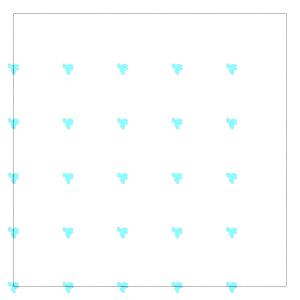

In [36]:
render(frame)

In [37]:
def shoelace_area():
    vertices = [
        (0.1709401709401709,-0.5899408284023668),
        (0.1709401709401709,-0.2553254437869822),
        (0.5042735042735043,-0.08994082840236695),
        (0.3931623931623931,0.07544378698224852),
        (0.5042735042735043,0.2446745562130177),
        (0.1709401709401709,0.41005917159763317),
        (-0.16239316239316243,0.2446745562130177),
        (-0.27350427350427353,0.41005917159763317),
        (-0.49572649572649574,0.41005917159763317),
        (-0.49572649572649574,0.07544378698224852),
        (-0.16239316239316243,-0.08994082840236695),
        (-0.27350427350427353,-0.2553254437869822),
        (-0.05128205128205132,-0.5899408284023668)
    ]
    n = len(vertices)
    area = 0.5 * abs(sum(vertices[i][0] * vertices[(i + 1) % n][1] - vertices[i][1] * vertices[(i + 1) % n][0] for i in range(n)))
    return area

area = shoelace_area()
vf = area*25/(L*L)
vf, area

(0.023717948717948717, 0.592948717948718)

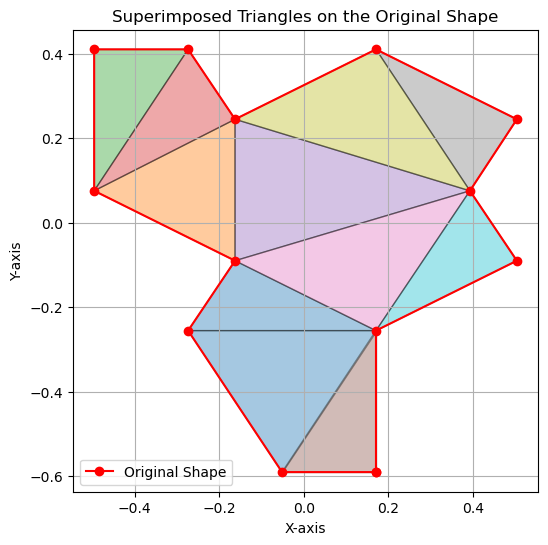

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the triangles
tri_1 = np.array([[-0.16239316239316243, -0.08994082840236695],
                  [-0.27350427350427353, -0.2553254437869822],
                  [0.1709401709401709, -0.2553254437869822]])

tri_2 = np.array([[-0.49572649572649574, 0.07544378698224852],
                  [-0.16239316239316243, -0.08994082840236695],
                  [-0.16239316239316243, 0.2446745562130177]])

tri_3 = np.array([[-0.49572649572649574, 0.07544378698224852],
                  [-0.27350427350427353, 0.41005917159763317],
                  [-0.49572649572649574, 0.41005917159763317]])

tri_4 = np.array([[-0.27350427350427353, 0.41005917159763317],
                  [-0.49572649572649574, 0.07544378698224852],
                  [-0.16239316239316243, 0.2446745562130177]])

tri_5 = np.array([[-0.16239316239316243, -0.08994082840236695],
                  [0.3931623931623931, 0.07544378698224852],
                  [-0.16239316239316243, 0.2446745562130177]])

tri_6 = np.array([[-0.05128205128205132, -0.5899408284023668],
                  [0.1709401709401709, -0.5899408284023668],
                  [0.1709401709401709, -0.2553254437869822]])

tri_7 = np.array([[0.3931623931623931, 0.07544378698224852],
                  [-0.16239316239316243, -0.08994082840236695],
                  [0.1709401709401709, -0.2553254437869822]])

tri_8 = np.array([[0.1709401709401709, 0.41005917159763317],
                  [0.3931623931623931, 0.07544378698224852],
                  [0.5042735042735043, 0.2446745562130177]])

tri_9 = np.array([[0.1709401709401709, 0.41005917159763317],
                 [-0.16239316239316243, 0.2446745562130177],
                  [0.3931623931623931, 0.07544378698224852]])

tri_10 = np.array([[0.3931623931623931, 0.07544378698224852],
                  [0.1709401709401709, -0.2553254437869822],
                  [0.5042735042735043, -0.08994082840236695]])

tri_11 = np.array([[0.1709401709401709, -0.2553254437869822],
                  [-0.27350427350427353, -0.2553254437869822],
                  [-0.05128205128205132, -0.5899408284023668]])

# List of all triangles
triangles = [tri_1, tri_2, tri_3, tri_4, tri_5, tri_6, tri_7, tri_8, tri_9, tri_10, tri_11]

# Plotting the triangles
plt.figure(figsize=(6, 6))

# Plot each triangle
for tri in triangles:
    x, y = zip(*tri)  # Extract x, y coordinates
    plt.fill(x, y, edgecolor='black', alpha=0.4)  # Plot with transparency

# Vertices from the original shape
vertices = [
    (0.1709401709401709, -0.5899408284023668),
    (0.1709401709401709, -0.2553254437869822),
    (0.5042735042735043, -0.08994082840236695),
    (0.3931623931623931, 0.07544378698224852),
    (0.5042735042735043, 0.2446745562130177),
    (0.1709401709401709, 0.41005917159763317),
    (-0.16239316239316243, 0.2446745562130177),
    (-0.27350427350427353, 0.41005917159763317),
    (-0.49572649572649574, 0.41005917159763317),
    (-0.49572649572649574, 0.07544378698224852),
    (-0.16239316239316243, -0.08994082840236695),
    (-0.27350427350427353, -0.2553254437869822),
    (-0.05128205128205132, -0.5899408284023668)
]

# Plot the original shape
x, y = zip(*vertices + [vertices[0]])  # Close the loop
plt.plot(x, y, marker='o', color='red', label="Original Shape")

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Superimposed Triangles on the Original Shape')
plt.legend()

# Show plot
plt.grid(True)
plt.axis('equal')
plt.show()


In [5]:
fn = os.path.join(os.getcwd(), 'tile_lattice.gsd')
![ -e "$fn" ] && rm "$fn"

with gsd.hoomd.open(name='tile_lattice.gsd', mode='x') as f:
    f.append(frame)

In [39]:
cpu = hoomd.device.CPU()

In [40]:
simulation = hoomd.Simulation(device=cpu, seed=17)
simulation.create_state_from_gsd(filename='tile_lattice.gsd')

In [41]:
fn = os.path.join(os.getcwd(), 'trajectory_expansion_v1.gsd')
![ -e "$fn" ] && rm "$fn"

gsd_writer = hoomd.write.GSD(
    filename='trajectory_expansion_v1.gsd', trigger=hoomd.trigger.Periodic(100), mode='xb'
)
simulation.operations.writers.append(gsd_writer)

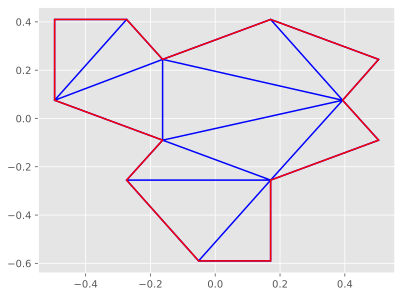

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import triangle

# Define your polygon
vertices = [
    (0.1709401709401709, -0.5899408284023668),
    (0.1709401709401709, -0.2553254437869822),
    (0.5042735042735043, -0.08994082840236695),
    (0.3931623931623931, 0.07544378698224852),
    (0.5042735042735043, 0.2446745562130177),
    (0.1709401709401709, 0.41005917159763317),
    (-0.16239316239316243, 0.2446745562130177),
    (-0.27350427350427353, 0.41005917159763317),
    (-0.49572649572649574, 0.41005917159763317),
    (-0.49572649572649574, 0.07544378698224852),
    (-0.16239316239316243, -0.08994082840236695),
    (-0.27350427350427353, -0.2553254437869822),
    (-0.05128205128205132, -0.5899408284023668)
]
polygon = Polygon(vertices)

# Convert to a format suitable for Triangle     
poly_dict = {
    "vertices": vertices,
    "segments": [(i, (i + 1) % len(vertices)) for i in range(len(vertices))],
}

# Perform constrained triangulation
triangulated = triangle.triangulate(poly_dict, "p")  # "p" ensures constrained triangulation

# Plot the result
plt.triplot(
    triangulated["vertices"][:, 0],
    triangulated["vertices"][:, 1],
    triangulated["triangles"],
    color="blue"
)
plt.plot(*polygon.exterior.xy, color="red")  # Overlay original polygon
plt.show()


In [ ]:
triangles = [
    [
        triangulated["vertices"][i] for i in triangle_indices
    ] for triangle_indices in triangulated["triangles"]
]

In [38]:
triangle_shapes = [
    {"vertices": [(x, y, 0.0) for x, y in triangle], "radius": 0.0}
    for triangle in triangles
]

In [78]:
tri_1 = np.array([[-0.16239316239316243, -0.08994082840236695, 0.0],
                  [-0.27350427350427353, -0.2553254437869822, 0.0],
                  [0.1709401709401709, -0.2553254437869822, 0.0]])

tri_2 = np.array([[-0.49572649572649574, 0.07544378698224852, 0.0],
                  [-0.16239316239316243, -0.08994082840236695, 0.0],
                  [-0.16239316239316243, 0.2446745562130177, 0.0]])

tri_3 = np.array([[-0.49572649572649574, 0.07544378698224852, 0.0],
                  [-0.27350427350427353, 0.41005917159763317, 0.0],
                  [-0.49572649572649574, 0.41005917159763317, 0.0]])

tri_4 = np.array([[-0.27350427350427353, 0.41005917159763317, 0.0],
                  [-0.49572649572649574, 0.07544378698224852, 0.0],
                  [-0.16239316239316243, 0.2446745562130177, 0.0]])

tri_5 = np.array([[-0.16239316239316243, -0.08994082840236695, 0.0],
                  [0.3931623931623931, 0.07544378698224852, 0.0],
                  [-0.16239316239316243, 0.2446745562130177, 0.0]])

tri_6 = np.array([[-0.05128205128205132, -0.5899408284023668, 0.0],
                  [0.1709401709401709, -0.5899408284023668, 0.0],
                  [0.1709401709401709, -0.2553254437869822, 0.0]])

tri_7 = np.array([[0.3931623931623931, 0.07544378698224852, 0.0],
                  [-0.16239316239316243, -0.08994082840236695, 0.0],
                  [0.1709401709401709, -0.2553254437869822, 0.0]])

tri_8 = np.array([[0.1709401709401709, 0.41005917159763317, 0.0],
                  [0.3931623931623931, 0.07544378698224852, 0.0],
                  [0.5042735042735043, 0.2446745562130177, 0.0]])

tri_9 = np.array([[0.1709401709401709, 0.41005917159763317, 0.0],
                 [-0.16239316239316243, 0.2446745562130177, 0.0],
                  [0.3931623931623931, 0.07544378698224852, 0.0]])

tri_10 = np.array([[0.3931623931623931, 0.07544378698224852, 0.0],
                  [0.1709401709401709, -0.2553254437869822, 0.0],
                  [0.5042735042735043, -0.08994082840236695, 0.0]])

tri_11 = np.array([[0.1709401709401709, -0.2553254437869822, 0.0],
                  [-0.27350427350427353, -0.2553254437869822, 0.0],
                  [-0.05128205128205132, -0.5899408284023668, 0.0]])

def calculate_centroid(triangle):
    return np.mean(triangle, axis=0)

triangles = [tri_1, tri_2, tri_3, tri_4, tri_5, tri_6, tri_7, tri_8, tri_9, tri_10, tri_11]

centroids = [calculate_centroid(triangle) for triangle in triangles]

for i, centroid in enumerate(centroids, start=1):
    print(f'{i}: {centroid}')

1: [-0.08831909 -0.20019724  0.        ]
2: [-0.27350427  0.07672584  0.        ]
3: [-0.42165242  0.29852071  0.        ]
4: [-0.31054131  0.2433925   0.        ]
5: [0.02279202 0.07672584 0.        ]
6: [ 0.0968661  -0.47840237  0.        ]
7: [ 0.13390313 -0.08994083  0.        ]
8: [0.35612536 0.2433925  0.        ]
9: [0.13390313 0.2433925  0.        ]
10: [ 0.35612536 -0.08994083  0.        ]
11: [-0.05128205 -0.36686391  0.        ]


In [80]:
def calculate_centroid(triangle):
    return np.mean(triangle, axis=0)

# Store triangles in a list
triangles = [tri_1, tri_2, tri_3, tri_4, tri_5, tri_6, tri_7, tri_8, tri_9, tri_10, tri_11]

# Initialize dictionary to store results
translated_triangles = {}

# Calculate centroids, translate, and format results
for i, triangle in enumerate(triangles, start=1):
    centroid = calculate_centroid(triangle)
    translated_triangle = triangle - centroid
    translated_triangles[f"tri_{i}"] = {
        "vertices": translated_triangle.tolist()
    }

# Display the translated triangles
for name, data in translated_triangles.items():
    print(f"{name} = {data}")


tri_1 = {'vertices': [[-0.07407407407407407, 0.11025641025641017, 0.0], [-0.18518518518518517, -0.05512820512820507, 0.0], [0.25925925925925924, -0.05512820512820507, 0.0]]}
tri_2 = {'vertices': [[-0.22222222222222215, -0.0012820512820512359, 0.0], [0.11111111111111116, -0.16666666666666669, 0.0], [0.11111111111111116, 0.16794871794871796, 0.0]]}
tri_3 = {'vertices': [[-0.07407407407407413, -0.22307692307692312, 0.0], [0.14814814814814808, 0.11153846153846153, 0.0], [-0.07407407407407413, 0.11153846153846153, 0.0]]}
tri_4 = {'vertices': [[0.037037037037037035, 0.1666666666666667, 0.0], [-0.18518518518518517, -0.16794871794871793, 0.0], [0.14814814814814814, 0.0012820512820512497, 0.0]]}
tri_5 = {'vertices': [[-0.18518518518518517, -0.16666666666666669, 0.0], [0.37037037037037035, -0.0012820512820512359, 0.0], [-0.18518518518518517, 0.16794871794871796, 0.0]]}
tri_6 = {'vertices': [[-0.14814814814814814, -0.11153846153846153, 0.0], [0.07407407407407407, -0.11153846153846153, 0.0], [0.07

In [ ]:
# Function to calculate the cross product to check the orientation of the triangle
def cross_product(vertices):
    x1, y1 = vertices[0]
    x2, y2 = vertices[1]
    x3, y3 = vertices[2]
    
    # Cross product (z-component)
    cross_prod = (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)
    return cross_prod

# Define the triangles
tri_1_vertices = [(-0.07407407, 0.11025641), (-0.18518519, -0.05512821), (0.25925926, -0.05512821)]
tri_2_vertices = [(-0.22222222, -0.00128205), (0.11111111, -0.16666667), (0.11111111, 0.1679487)]

# Calculate the cross products for both triangles
cross_prod_1 = cross_product(tri_1_vertices)
cross_prod_2 = cross_product(tri_2_vertices)

cross_prod_1, cross_prod_2


In [46]:
# Initialize the HOOMD simulation
simulation = hoomd.Simulation(device=hoomd.device.CPU(), seed=17)
simulation.create_state_from_gsd(filename='tile_lattice.gsd')

# Define the HPMC integrator for ConvexSpheropolyhedronUnion
mc = hoomd.hpmc.integrate.ConvexSpheropolyhedronUnion(default_d=0.1, default_a=0.1)

# Define the shapes as a union of convex spheropolyhedra
mc.shape["Hat_Tile"] = {
    "shapes": [
        {"vertices": [[-0.07407407407407407, 0.11025641025641017, 0.0], [-0.18518518518518517, -0.05512820512820507, 0.0], [0.25925925925925924, -0.05512820512820507, 0.0]], "sweep_radius": 0},
        {"vertices": [[-0.22222222222222215, -0.0012820512820512359, 0.0], [0.11111111111111116, -0.16666666666666669, 0.0], [0.11111111111111116, 0.16794871794871796, 0.0]], "sweep_radius": 0.02},
        {"vertices": [[0.14814814814814808, 0.11153846153846153, 0.0], [-0.07407407407407413, 0.11153846153846153, 0.0], [-0.07407407407407413, -0.22307692307692312, 0.0]], "sweep_radius": 0.02},
        {"vertices": [[0.037037037037037035, 0.1666666666666667, 0.0], [-0.18518518518518517, -0.16794871794871793, 0.0], [0.14814814814814814, 0.0012820512820512497, 0.0]], "sweep_radius": 0.02},
        {"vertices": [[-0.18518518518518517, 0.16794871794871796, 0.0], [-0.18518518518518517, -0.16666666666666669, 0.0], [0.37037037037037035, -0.0012820512820512359, 0.0]], "sweep_radius": 0.02},
        {"vertices": [[-0.14814814814814814, -0.11153846153846153, 0.0], [0.07407407407407407, -0.11153846153846153, 0.0], [0.07407407407407407, 0.22307692307692312, 0.0]], "sweep_radius": 0.02},
        {"vertices": [[0.25925925925925924, 0.1653846153846154, 0.0], [-0.2962962962962963, -6.938893903907228e-17, 0.0], [0.037037037037037035, -0.1653846153846153, 0.0]], "sweep_radius": 0.02},
        {"vertices": [[-0.18518518518518517, 0.1666666666666667, 0.0], [0.037037037037037035, -0.16794871794871793, 0.0], [0.1481481481481482, 0.0012820512820512497, 0.0]], "sweep_radius": 0.02},
        {"vertices": [[0.037037037037037035, 0.1666666666666667, 0.0], [-0.2962962962962963, 0.0012820512820512497, 0.0], [0.25925925925925924, -0.16794871794871793, 0.0]], "sweep_radius": 0.02},
        {"vertices": [[0.037037037037037035, 0.1653846153846154, 0.0], [-0.18518518518518517, -0.1653846153846153, 0.0], [0.1481481481481482, -6.938893903907228e-17, 0.0]], "sweep_radius": 0.02},
        {"vertices": [[0.2222222222222222, 0.11153846153846153, 0.0], [-0.2222222222222222, 0.11153846153846153, 0.0], [0.0, -0.22307692307692312, 0.0]]}
    ],
    "positions": [
        (-0.08831909, -0.20019724, 0), 
        (-0.27350427, 0.07672584, 0),
        (-0.42165242, 0.29852071, 0),
        (-0.31054131, 0.2433925, 0),
        (0.02279202, 0.07672584, 0),
        (0.0968661, -0.47840237, 0),
        (0.13390313, -0.08994083, 0),
        (0.35612536, 0.2433925, 0),
        (0.13390313, 0.2433925, 0),
        (0.35612536, -0.08994083, 0),
        (-0.05128205, -0.36686391, 0)
    ],
    "orientations": [(1, 0, 0, 0)] * 11,
    "overlap": [0] * 11  # No overlap adjustment for now
}

simulation.operations.integrator = mc

# Set up a writer to log the trajectory
fn = os.path.join(os.getcwd(), 'trajectory_expansion_v1.gsd')
if os.path.exists(fn):
    os.remove(fn)

gsd_writer = hoomd.write.GSD(
    filename='trajectory_expansion_v1.gsd', trigger=hoomd.trigger.Periodic(100), mode='xb'
)
simulation.operations.writers.append(gsd_writer)

# Run the simulation for a given number of steps
simulation.run(100000)



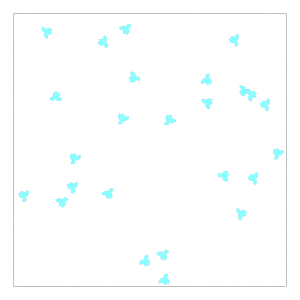

In [47]:
render(simulation.state.get_snapshot())

In [48]:
mc.overlaps

0

In [103]:
simulation.timestep

1000

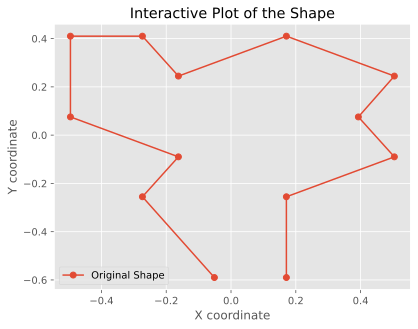

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Original vertices of the concave shape
points = np.array([
    (0.1709401709401709, -0.5899408284023668),
    (0.1709401709401709, -0.2553254437869822),
    (0.5042735042735043, -0.08994082840236695),
    (0.3931623931623931, 0.07544378698224852),
    (0.5042735042735043, 0.2446745562130177),
    (0.1709401709401709, 0.41005917159763317),
    (-0.16239316239316243, 0.2446745562130177),
    (-0.27350427350427353, 0.41005917159763317),
    (-0.49572649572649574, 0.41005917159763317),
    (-0.49572649572649574, 0.07544378698224852),
    (-0.16239316239316243, -0.08994082840236695),
    (-0.27350427350427353, -0.2553254437869822),
    (-0.05128205128205132, -0.5899408284023668)
])

# Create a figure and axis for plotting
fig, ax = plt.subplots()
ax.plot(points[:, 0], points[:, 1], 'o-', label='Original Shape')
ax.set_title('Interactive Plot of the Shape')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.legend()

# Function to annotate the vertices with their coordinates on hover
def on_plot_hover(event):
    for i, (x, y) in enumerate(points):
        distance = np.sqrt((x - event.xdata)**2 + (y - event.ydata)**2)
        if distance < 0.05:  # threshold for sensitivity, adjust as needed
            ax.annotate(f'({x:.2f}, {y:.2f})', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
            fig.canvas.draw_idle()

# Connect the event to the function
fig.canvas.mpl_connect('motion_notify_event', on_plot_hover)

plt.show()


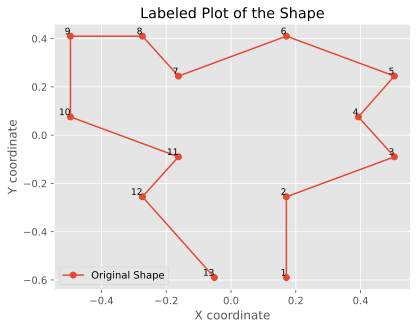

In [9]:
# Creating the plot with labeled vertices to easily identify each point

# Create a new figure and axis for plotting
fig, ax = plt.subplots()
ax.plot(points[:, 0], points[:, 1], 'o-', label='Original Shape')  # Plot the shape
ax.set_title('Labeled Plot of the Shape')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

# Label each vertex
for i, (x, y) in enumerate(points):
    ax.text(x, y, f'{i+1}', fontsize=9, ha='right', va='bottom')

ax.legend()
plt.show()
